In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.utils import shuffle
from scipy.io import arff
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Unified-file.csv")
df.shape,df.columns,np.unique(df.dtypes,return_counts=True)

((43744, 11),
 Index(['ID', 'Name', 'LongName', 'Parent', 'McCC', 'CLOC', 'PDA', 'PUA',
        'LLOC', 'LOC', 'bug'],
       dtype='object'),
 (array([dtype('int64'), dtype('O')], dtype=object), array([7, 4])))

In [6]:
cat_cols = df.columns[df.dtypes==object]
df = df.drop(columns=cat_cols)
df.shape,df.columns,np.unique(df.dtypes,return_counts=True)

((43744, 7),
 Index(['McCC', 'CLOC', 'PDA', 'PUA', 'LLOC', 'LOC', 'bug'], dtype='object'),
 (array([dtype('int64')], dtype=object), array([7])))

In [7]:
df['bug'] = np.where(df['bug']>0,1,0)
Y = df['bug'].values
X = df.drop(columns=['bug']).values
X,Y = shuffle(X,Y)
X.shape

(43744, 6)

In [8]:
df.describe()

,McCC,CLOC,PDA,PUA,LLOC,LOC,bug
count,43744.000000,43744.0,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000
mean,15.846402,0.0,3.555230,3.770780,112.850974,187.842058,0.234089
std,49.896151,0.0,7.393114,12.943673,217.998650,315.841726,0.423433
min,1.000000,0.0,0.000000,0.000000,0.000000,4.000000,0.000000
25%,1.000000,0.0,0.000000,0.000000,19.000000,51.000000,0.000000
50%,4.000000,0.0,1.000000,1.000000,50.000000,96.000000,0.000000
75%,14.000000,0.0,4.000000,4.000000,121.000000,198.000000,0.000000
max,5483.000000,0.0,372.000000,843.000000,11296.000000,13508.000000,1.000000


In [9]:
np.unique(Y,return_counts=True)

(array([0, 1]), array([33504, 10240]))

/home/shihab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


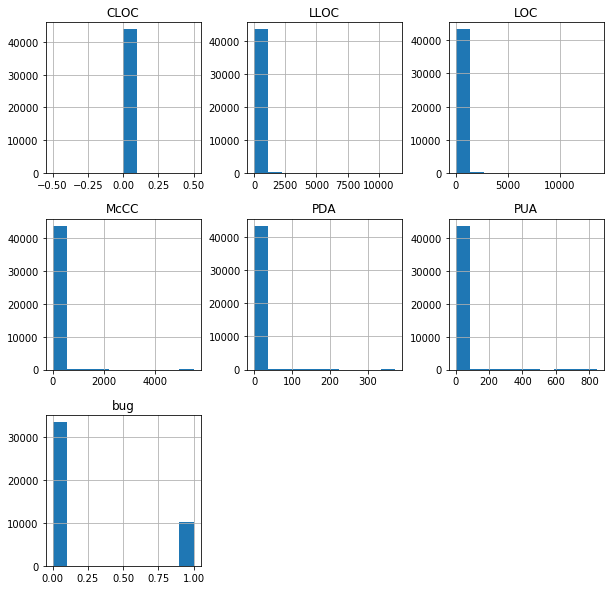

In [14]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax = ax);

In [11]:
dt = GridSearchCV(DecisionTreeClassifier(),{'max_leaf_nodes':[10,50,None]},cv=4,iid=False)
rf = RandomForestClassifier(n_estimators=500)
svm = GridSearchCV(SVC(gamma='scale'),{'C':[0.1, 1, 10]},cv=4,iid=False)
knn = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[3,5,10,20]},cv=4,iid=False)

In [12]:
cv = RepeatedStratifiedKFold(n_repeats=5,n_splits=10)
res = cross_val_score(rf,X,Y,cv=cv,scoring='f1',n_jobs=-1)
res.mean(),res.std(), res

/home/shihab/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/shihab/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/shihab/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


(0.4216370402462713,
 0.015862730681040937,
 array([0.39454976, 0.4331582 , 0.44753623, 0.42773893, 0.42123687,
        0.40281856, 0.44547028, 0.40373396, 0.41489971, 0.42142437,
        0.41799882, 0.42988506, 0.41893491, 0.40612125, 0.40612125,
        0.40873257, 0.42924528, 0.43882826, 0.43523316, 0.42371906,
        0.42589438, 0.41780415, 0.44686962, 0.41061947, 0.41456254,
        0.36720143, 0.40504808, 0.43438395, 0.43644806, 0.44729179,
        0.42424242, 0.43988604, 0.42555619, 0.43331392, 0.42840647,
        0.39545998, 0.40911818, 0.4176611 , 0.44457209, 0.40301974,
        0.43313609, 0.41524927, 0.40876777, 0.43913803, 0.41520468,
        0.41543027, 0.42938497, 0.41613092, 0.41805226, 0.43661171]))